# 3.9 Comparison of importance sampling methods - Figures


In [ ]:
library(here)
source(here("code/setup.R"))

df_mse <- read_csv(here("data/figures/03_state_space_models/compare_ce_eis_mse.csv"))
df_ef <- read_csv(here("data/figures/03_state_space_models/ef_large_N.csv"))
df_dimensions <- read_csv(here("data/figures/03_state_space_models/ef_dimensions.csv"))

here() starts at /Users/stefan/workspace/work/phd/thesis



pdf 
  2

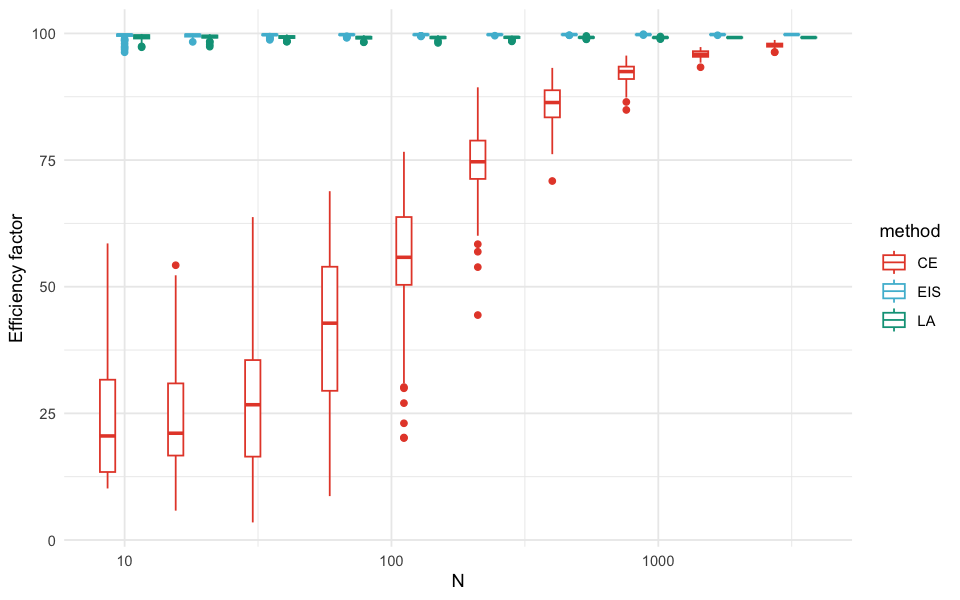

In [ ]:
df_mse %>%
    ggplot(aes(N, ef, group = interaction(N, method))) +
    geom_boxplot(aes(color = method)) +
    scale_x_log10() +
    labs(x="N", y="Efficiency factor")

ggsave_tikz(here("tikz/ef_comparison_medium_N.tex"))

pdf 
  2

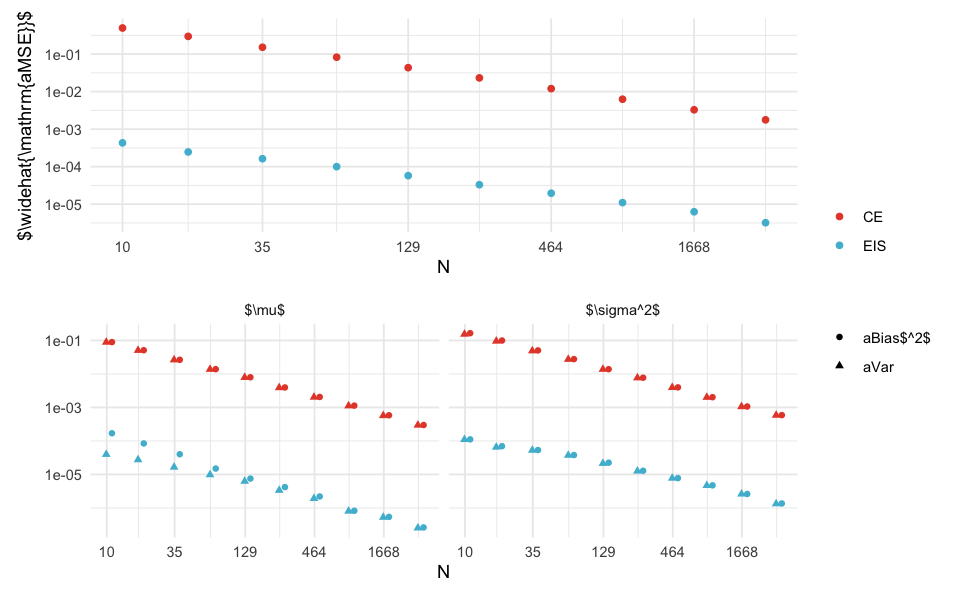

In [ ]:
Ns <- df_mse %>% 
    distinct(N) %>%
    pull

mse_plot <- df_mse %>%
    filter(method != "LA") %>%
    mutate(mse = mean_bias + mean_var + var_bias + var_var) %>%
    select(method, N, mse) %>%
    group_by(method, N) %>%
    summarise(lower = t.test(mse)$conf.int[1], upper = t.test(mse)$conf.int[2], middle = mean(mse)) %>%
    ggplot(aes(N, group = interaction(N, method))) +
    #geom_boxplot(aes(color = method)) +
    geom_point(aes(y=middle, color=method)) +
    scale_x_log10(breaks = Ns[c(T,F)], minor_breaks = Ns[c(F,T)]) +
    scale_y_log10() +
    scale_shape_discrete(name="") +
    scale_color_discrete(name="") +
    labs(x="N", y="$\\widehat{\\mathrm{aMSE}}$")


bias_var_plot <- df_mse %>%
    filter(method != "LA") %>%
    select(method, N, mean_bias:var_var) %>%
    pivot_longer(-c(method, N)) %>%
    mutate(parameter = ifelse(str_starts(name, "mean"), "$\\mu$", "$\\sigma^2$")) %>% 
    mutate(type=ifelse(str_ends(name, "bias"), "aBias$^2$", "aVar")) %>%
    mutate(combination = paste0(method, " - ", type)) %>%
    select(N, value, method, combination, type, parameter) %>%
    group_by(N, method, combination, type, parameter) %>%
    summarise(lower = t.test(value)$conf.int[1], upper = t.test(value)$conf.int[2], middle = mean(value)) %>%
    ggplot(aes(N, middle)) +
    #geom_boxplot(aes(color=method, group=interaction(N, combination), linetype = type)) +
    #geom_errorbar(aes(ymin = lower, ymax = upper, color=method, group=interaction(N, combination), linetype = type)) +
    geom_point(aes(x = N * ifelse(type == "aBias$^2$", 1.1, 1/1.01), y=middle, color=method, pch=type)) +
    #geom_smooth(aes(color=method), method='lm', se=FALSE, alpha = .1) + 
    scale_y_log10() +
    scale_x_log10(breaks = Ns[c(T,F)], minor_breaks = Ns[c(F,T)]) +
    facet_wrap(~parameter) +
    scale_shape_discrete(name="") +
    scale_color_discrete(name="") +
    xlab("N") + ylab("")

(mse_plot / bias_var_plot) + plot_layout(guides = "collect")
ggsave_tikz(here("tikz/mse_bias_var_decomposition.tex"))

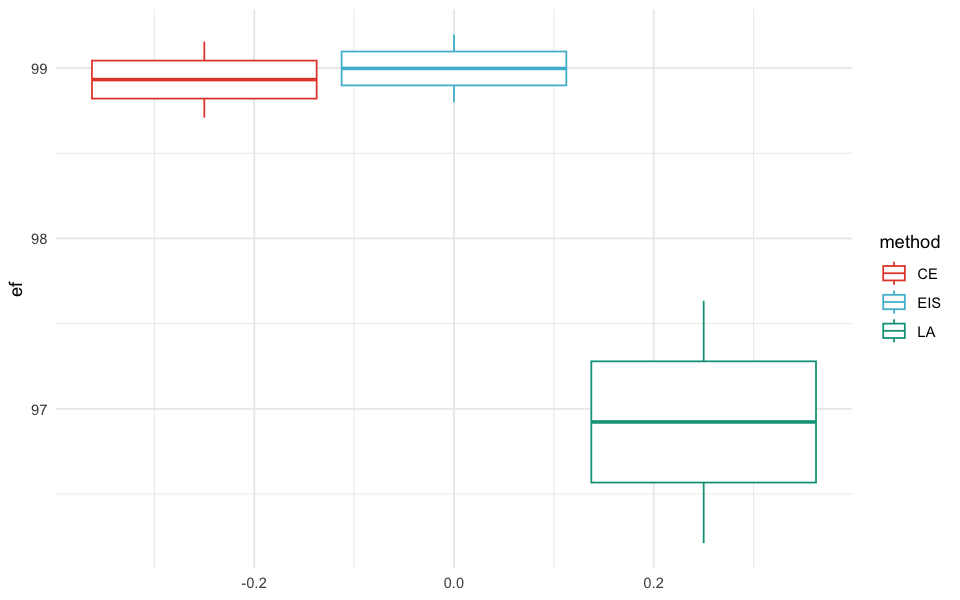

In [ ]:
df_ef %>%
    ggplot(aes(y=ef, color=method)) +
    geom_boxplot() 

Storing counts in `nn`, as `n` already present in input
i Use `name = "new_name"` to pick a new name.


pdf 
  2

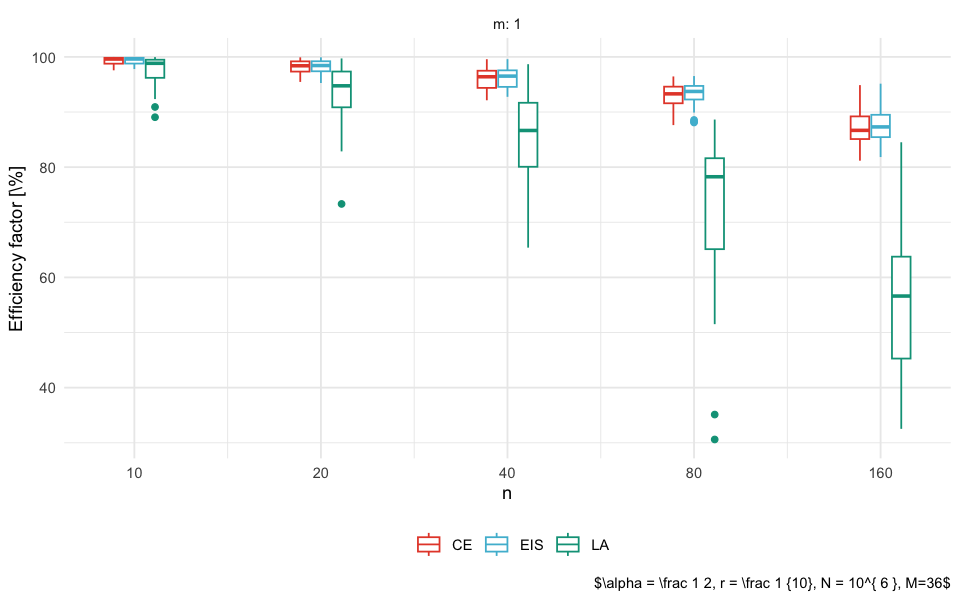

In [ ]:
N <- df_dimensions %>%
    pull(N) %>%
    unique
    
M <- df_dimensions %>%
    count(N,n,m, method) %>%
    pull(nn) %>%
    min

ns <- df_dimensions %>%
    distinct(n) %>%
    pull(n)

caption <- str_glue("$\\alpha = \\frac 1 2, r = \\frac 1 {{10}}, N = 10^{{ {round(log(N, 10))} }}, M={M}$")

df_dimensions %>%
    ggplot(aes(x=n, y=ef, color=method)) +
    geom_boxplot(aes(group = interaction(n, method)), width=.1) +
    scale_x_log10(breaks=ns) +
    labs(x="n", y="Efficiency factor [\\%]", caption=caption) +
    facet_wrap(~m, label=label_both)  +
    scale_color_discrete(name="") + 
    theme(legend.position = "bottom")

ggsave_tikz(here("tikz/ef_time_dimension.tex"))